# Analyse de l'Impact du Revenu National sur l'Adoption des Énergies Renouvelables : Une Étude à l'Aide de l'ANOVA  (ANOVA à un facteur) 

## Problématique

  L'adoption des énergies renouvelables varie considérablement à travers le monde, influencée par une multitude de facteurs économiques, sociaux et politiques. Parmi ces facteurs, le revenu national des pays joue un rôle crucial. En effet, les pays à revenu élevé ont souvent les moyens d'investir dans les technologies énergétiques avancées, tandis que les pays à revenu faible ou intermédiaire peuvent rencontrer des difficultés pour développer des sources d'énergie renouvelables en raison de limitations économiques et infrastructurelles.
  
  L'une des questions centrales dans l'étude de la transition énergétique mondiale est de savoir si les pays à revenu élevé adoptent de manière significativement plus importante les énergies renouvelables que les pays à revenu plus faible. Cette question soulève une interrogation fondamentale sur l’impact des ressources économiques sur la transition énergétique mondiale.

  L'objectif est de comparer le taux d'adoption des énergies renouvelables entre les groupes de pays classés par revenu (faible, intermédiaire, élevé). En utilisant une ANOVA à un facteur (One-Way ANOVA), nous testerons si le taux d'énergie renouvelable est statistiquement différent entre les groupes de pays en fonction de leur niveau de revenu.

L'ANOVA permet de vérifier si les différences observées dans les taux d'énergie renouvelable sont significatives et non dues au hasard. Ce test statistique nous aidera à déterminer s'il existe une relation entre le niveau de revenu d'un pays et son taux d'adoption des énergies renouvelables.

## Étape 1 : Importation des bibliothèques nécessaires

In [26]:
# Importer les bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

## Étape 2 : Chargement et exploration des données

In [2]:
# Charger le fichier CSV contenant les données
df = pd.read_csv("transition_energetique_pays_2023.csv")

# Afficher les premières lignes pour vérifier la structure des données
print(df.head())

                          Pays  Taux d'énergie renouvelable  Année  \
0                  Afghanistan                    17.846154   2023   
1  Africa Eastern and Southern                    62.614134   2023   
2   Africa Western and Central                    77.223132   2023   
3                      Albania                    39.283333   2023   
4                      Algeria                     0.150000   2023   

   Investissements en énergies renouvelables (% du PIB)  \
0                                           4.838663      
1                                           1.346697      
2                                           0.335375      
3                                           0.000000      
4                                           0.018654      

   PIB par habitant (USD)  Taux de scolarisation secondaire (%)  \
0              415.707417                             47.154018   
1             1659.515290                             69.520690   
2             1568.7243

In [3]:
# Vérification des colonnes et des types de données
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Pays                                                  266 non-null    object 
 1   Taux d'énergie renouvelable                           266 non-null    float64
 2   Année                                                 266 non-null    int64  
 3   Investissements en énergies renouvelables (% du PIB)  266 non-null    float64
 4   PIB par habitant (USD)                                266 non-null    float64
 5   Taux de scolarisation secondaire (%)                  266 non-null    float64
 6   Accès à l'électricité (%)                             266 non-null    float64
 7   Revenu                                                266 non-null    object 
 8   Dépassement 50%                                       266 no

## Étape 3 : Préparation des données

#### 1-Sélectionner les colonnes nécessaires.

In [4]:
# Créer un DataFrame avec les colonnes nécessaires pour l'ANOVA
df_anova = df[['Pays', 'Taux d\'énergie renouvelable', 'Revenu']]

#### 2-Vérifier la distribution des données.

Avant de procéder à l'ANOVA, il est important de vérifier si les groupes sont correctement formés (par revenu) et de s'assurer qu'il y a assez de données dans chaque groupe pour que l'ANOVA soit significative.

In [5]:
# Vérification du nombre de pays dans chaque groupe de revenu
group_counts = df_anova.groupby('Revenu')['Pays'].count()
print(group_counts)

Revenu
High income            106
Low income              23
Lower middle income     66
Upper middle income     71
Name: Pays, dtype: int64


La répartition des pays par groupe de revenu est assez bien équilibrée, à l'exception du groupe 'Low income', qui est sous-représenté avec seulement 23 pays, ce qui pourrait légèrement affecter la fiabilité des résultats de l'ANOVA.

In [6]:
# Vérification des statistiques descriptives
print(df_anova.describe())

       Taux d'énergie renouvelable
count                   266.000000
mean                     29.667803
std                      27.240385
min                       0.000000
25%                       7.401923
50%                      21.750203
75%                      46.682692
max                      95.833333


   - La distribution des taux d'énergie renouvelable est large, avec une moyenne d'environ 29.67% mais une grande variabilité (écart type de 27.24%).
   - Les valeurs extrêmes (0% et 95.83%) montrent qu'il existe à la fois des pays avec une adoption très faible et d'autres avec une adoption très élevée des énergies renouvelables.

**a-Boxplot pour visualiser la distribution des taux d'adoption des énergies renouvelables selon les groupes de revenu :**

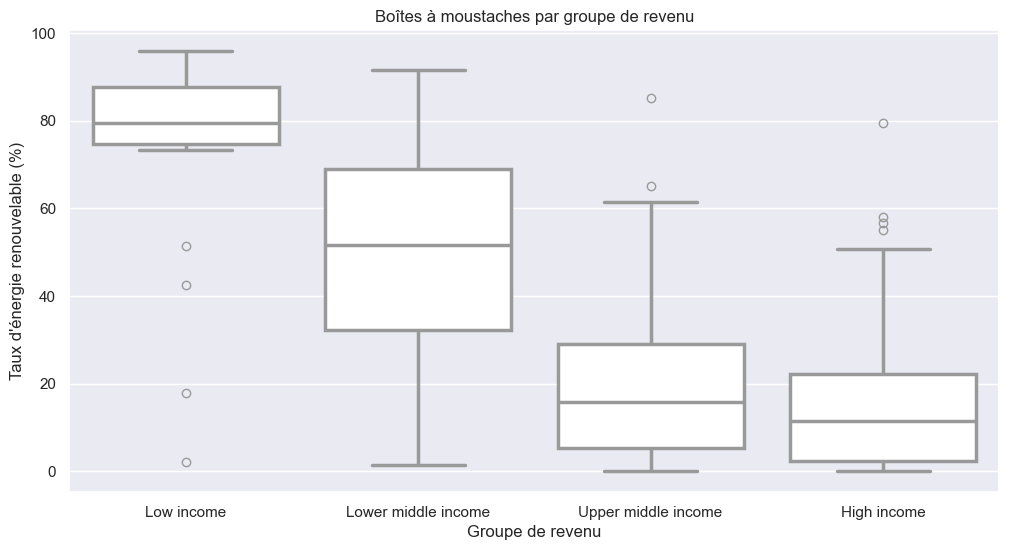

In [13]:
# Appliquer le style par défaut de seaborn
sns.set()

plt.figure(figsize=(12, 6))  

# Créer le boxplot pour visualiser la distribution des taux d'énergie renouvelable par groupe de revenu
ax = sns.boxplot(x="Revenu", y="Taux d'énergie renouvelable", data=df_anova, color='white', linewidth=2.5)

# Ajouter les labels et le titre
plt.xlabel('Groupe de revenu')
plt.ylabel('Taux d\'énergie renouvelable (%)')
plt.title('Boîtes à moustaches par groupe de revenu')

# Afficher le graphique
plt.show()

- Low Income:

Médiane élevée: La médiane est proche de 80%, ce qui signifie que la moitié des pays à faible revenu ont des taux d'énergie renouvelable autour de ce pourcentage.

Distribution serrée: La majorité des données sont concentrées autour de la médiane, indiquant une adoption élevée et relativement uniforme des énergies renouvelables.

- Lower Middle Income:

Médiane intermédiaire: La médiane se situe autour de 50%, montrant une adoption modérée des énergies renouvelables.

Large gamme: Les taux d'adoption varient considérablement, indiquant une diversité dans l'adoption des énergies renouvelables parmi ces pays.

- Upper Middle Income:

Médiane inférieure: La médiane est autour de 18%, ce qui signifie une adoption plus faible des énergies renouvelables.

Variabilité: Il existe des valeurs aberrantes, suggérant que certains pays adoptent beaucoup plus d'énergies renouvelables que d'autres au sein de ce groupe.

- High Income:

Médiane basse: La médiane est proche de 10%, indiquant que les pays à revenu élevé ont généralement des taux d'adoption plus faibles.

Outliers présents: Certains pays à revenu élevé adoptent beaucoup plus d'énergies renouvelables que la moyenne de leur groupe.

**b-Histogramme du taux d'énergie renouvelable par revenu**

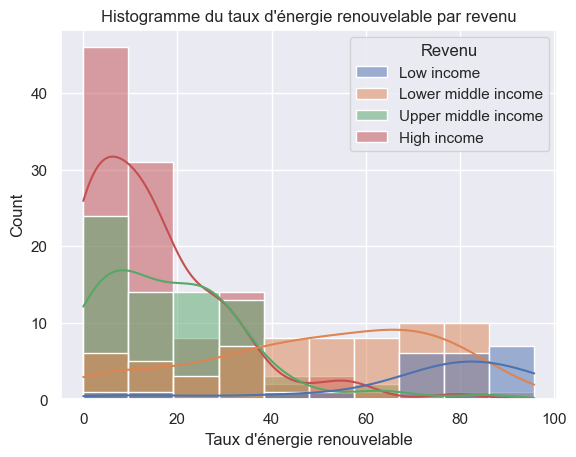

In [15]:
sns.histplot(data=df_anova, x='Taux d\'énergie renouvelable', hue='Revenu', kde=True)
plt.title("Histogramme du taux d'énergie renouvelable par revenu")
plt.show()

- Low Income (Faible Revenu) :

Pic au-dessus de 75 % : La majorité des pays à faible revenu ont des taux d'adoption des énergies renouvelables autour de 80 %.

Distribution concentrée : Une grande concentration de pays adopte des niveaux élevés de renouvelables, ce qui pourrait être dû à une plus grande dépendance sur des sources d'énergie traditionnelles renouvelables.

- Lower Middle Income (Revenu Intermédiaire Inférieur) :

Pic entre 40 % et 70 % : La distribution montre une adoption modérée des énergies renouvelables, avec un pic significatif dans cette plage.

Varieté Modérée : La distribution est plus large, indiquant une certaine variation dans l'adoption des énergies renouvelables parmi ces pays.

- Upper Middle Income (Revenu Intermédiaire Supérieur) :

Pic autour de 10 % à 30 % : Ce groupe montre un taux d'adoption plus bas, avec la majorité des pays autour de 10 % à 30 %.

Outliers et Distribution Plus Lâche : Une plus grande variabilité, avec quelques pays adoptant beaucoup plus ou beaucoup moins les énergies renouvelables.

- High Income (Revenu Élevé) :

Pic à 10 % à 20 % : Les pays à revenu élevé montrent une adoption des énergies renouvelables plus faible.

Distribution Étendue : Bien que la majorité des pays soient entre 10 % et 20 %, il y a des outliers significatifs qui adoptent à des taux beaucoup plus élevés.

- Conclusion

Les pays à faible revenu semblent avoir une adoption des énergies renouvelables plus élevée, potentiellement due à leur dépendance sur des sources d'énergie renouvelables traditionnelles.

Les pays à revenu intermédiaire montrent une gamme plus variée d'adoption, reflétant des différences dans l'accès aux ressources et aux technologies.

Les pays à revenu élevé ont une adoption plus faible mais avec une variabilité significative, probablement due à une diversité dans les choix énergétiques disponibles et les politiques environnementales.

## Étape 4 : Effectuer l'ANOVA pour tester l'influence de la catégorie de revenu sur le taux d'énergie renouvelable

In [22]:
# Effectuer l'ANOVA pour tester l'influence de la catégorie de revenu sur le taux d'énergie renouvelable
anova_renewable = smf.ols('Q("Taux d\'énergie renouvelable") ~ Revenu', data=df_anova).fit()

# Résumé des résultats de l'ANOVA
print(anova_renewable.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Q("Taux d'énergie renouvelable")   R-squared:                       0.518
Model:                                          OLS   Adj. R-squared:                  0.513
Method:                               Least Squares   F-statistic:                     94.01
Date:                              Fri, 27 Dec 2024   Prob (F-statistic):           2.53e-41
Time:                                      09:29:48   Log-Likelihood:                -1158.8
No. Observations:                               266   AIC:                             2326.
Df Residuals:                                   262   BIC:                             2340.
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
                                    coef    std err          t      P>

1. **Hypothèse nulle (H0)** : Les groupes de revenu (Low, Lower Middle, Upper Middle, High) n’ont pas d’effet significatif sur le taux d’énergie renouvelable.
   
2. **Hypothèse alternative (H1)** : Les groupes de revenu influencent significativement le taux d'énergie renouvelable.

##### Conclusion :

- Avec une p-value de **2.53e-41** (soit presque zéro), il est **extrêmement improbable** que les différences observées entre les groupes soient dues au hasard.
- Nous rejetons donc l'hypothèse nulle avec une grande confiance.
- 
- **Interprétation pratique** : Il existe des différences significatives dans les taux d'énergie renouvelable entre les groupes de revenu (Low, Lower Middle, Upper Middle, High). Cela confirme que la catégorie de revenu joue un rôle clé dans l'adoption des énergies renouvelables. 

**R-squared : 0.518**
   - Cela signifie que 51,8 % de la variance du taux d'énergie renouvelable est expliquée par la catégorie de revenu. Ce score indique que le modèle a une capacité modérée à expliquer la variation.



##### **Analyse des coefficients :**

1. **Intercept : 14.8523**
   - Ce coefficient représente la valeur moyenne prédite du taux d'énergie renouvelable pour la catégorie de référence, qui est **"High income"** (les catégories de revenu sont codées de manière dummy). En moyenne, les pays à revenu élevé ont un taux d'énergie renouvelable de 14,85 %.

2. **Revenu[T.Low income] : 58.8122**
   - Les pays à faible revenu (Low income) ont, en moyenne, un taux d'énergie renouvelable **58,81 % plus élevé** que les pays à revenu élevé. Ce résultat est hautement significatif (p < 0.001).

3. **Revenu[T.Lower middle income] : 34.7123**
   - Les pays à revenu intermédiaire inférieur (Lower middle income) ont, en moyenne, un taux d'énergie renouvelable **34,71 % plus élevé** que les pays à revenu élevé. Ce résultat est également hautement significatif (p < 0.001).

4. **Revenu[T.Upper middle income] : 4.1865**
   - Les pays à revenu intermédiaire supérieur (Upper middle income) ont un taux d'énergie renouvelable **4,18 % plus élevé** que les pays à revenu élevé. Cependant, ce résultat **n'est pas statistiquement significatif** (p = 0.152).


##### **Interprétation générale :**

- Les résultats montrent que les groupes de revenu influencent significativement le taux d'énergie renouvelable.
- Les pays à faible revenu et à revenu intermédiaire inférieur utilisent beaucoup plus d'énergie renouvelable que les pays à revenu élevé, ce qui est logique compte tenu de leur dépendance historique aux sources d'énergie renouvelables locales (comme la biomasse ou l'hydroélectricité) et d'une moindre industrialisation.
- Les pays à revenu intermédiaire supérieur ne diffèrent pas significativement des pays à revenu élevé, ce qui pourrait indiquer une transition énergétique similaire.

## Étape 5 : Appliquer le test post-hoc de Tukey

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1              group2       meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------
        High income          Low income  58.8122    0.0  47.5046  70.1198   True
        High income Lower middle income  34.7123    0.0  27.0045  42.4201   True
        High income Upper middle income   4.1865 0.4781  -3.3521  11.7252  False
         Low income Lower middle income -24.0999    0.0 -36.0027 -12.1971   True
         Low income Upper middle income -54.6256    0.0 -66.4197 -42.8316   True
Lower middle income Upper middle income -30.5257    0.0  -38.931 -22.1205   True
--------------------------------------------------------------------------------


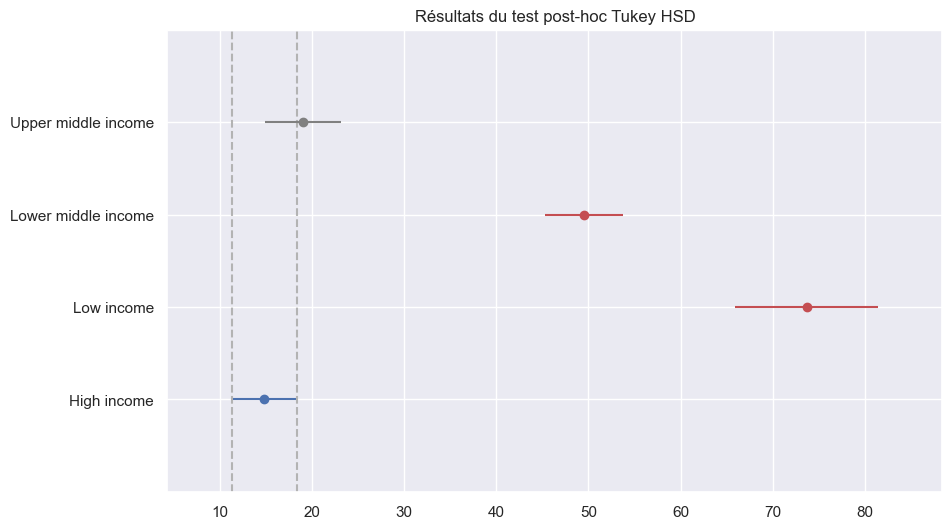

In [24]:
# Appliquer le test post-hoc de Tukey
tukey_result = pairwise_tukeyhsd(
    endog=df_anova["Taux d'énergie renouvelable"],  # Variable dépendante
    groups=df_anova["Revenu"],                     # Variable indépendante (groupes)
    alpha=0.05                                     # Niveau de signification
)

# Afficher les résultats du test
print(tukey_result)

# Visualiser les résultats
tukey_result.plot_simultaneous(comparison_name='High income', figsize=(10, 6))
plt.title("Résultats du test post-hoc Tukey HSD")
plt.show()


- Low income :
A un taux d'énergie renouvelable significativement plus élevé que tous les autres groupes.
- High income :
Montre des taux d'énergie renouvelable similaires aux pays Upper middle income, mais nettement inférieurs à ceux des groupes Low income et Lower middle income.
- Upper middle income :
Se situe entre les groupes High income et Lower middle income, avec des différences significatives par rapport à ces derniers.

#### tableau ANOVA

In [31]:
sm.stats.anova_lm(anova_renewable, typ=2)

sum_sq     df          F        PR(>F)
Revenu    101937.586890    3.0  94.005299  2.532403e-41
Residual   94702.632031  262.0        NaN           NaN

##### Explication du tableau ANOVA

Le tableau ANOVA présente les résultats de l'analyse de la variance, qui permet d'évaluer si les moyennes de plusieurs groupes sont significativement différentes. Voici une explication des colonnes du tableau :

1. **sum_sq (Sum of Squares)** :
   - **Revenu** : 101,937.59 représente la variabilité expliquée par la variable indépendante (catégorisation par Revenu).
   - **Residual** : 94,702.63 représente la variabilité résiduelle ou non expliquée (différences individuelles non attribuables à la variable "Revenu").

2. **df (Degrees of Freedom)** :
   - **Revenu** : 3, car il y a 4 groupes de revenu (Low income, Lower middle income, Upper middle income, High income), donc \( k - 1 = 3 \).
   - **Residual** : 262, qui correspond à \( N - k \), où \( N \) est le nombre total d'observations et \( k \) est le nombre de groupes.

3. **F (F-statistic)** :
   - Cette valeur, \( F = 94.005 \), est le rapport entre la variabilité expliquée par le modèle (entre groupes) et la variabilité résiduelle (intra-groupes). Un \( F \)-statistic élevé indique que les moyennes des groupes sont probablement différentes.

4. **PR(>F) (p-value)** :
   - La p-value est 2.532403e-41, soit extrêmement petite, ce qui indique une forte évidence contre l'hypothèse nulle.



##### Interprétation des résultats

1. **Hypothèse nulle (\( H_0 \))** :
   - Les moyennes des groupes de revenu (Low income, Lower middle income, Upper middle income, High income) sont égales.

2. **Hypothèse alternative (\( H_1 \))** :
   - Au moins un des groupes de revenu a une moyenne significativement différente.

3. **Décision** :
   - Puisque la p-value (2.532403e-41) est bien inférieure au seuil habituel (alpha = 0.05), on rejette \( H_0 \).

4. **Conclusion** :
   - Les groupes de revenu ont des moyennes significativement différentes pour la variable dépendante (le taux d'énergie renouvelable).

5. **Implication** :
   - La classification par Revenu explique une proportion significative de la variabilité dans la variable dépendante. Cela suggère que les niveaux de revenu influencent fortement la variable analysée.